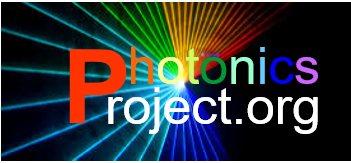
## Function: Blackbody Through Atmosphere

In [ ]:
#PLOT Plank Blackbody curve including subinterval  version 2.0
#%matplotlib widget
%matplotlib inline
#%matplotlib notebook
from ipywidgets import interact,Layout, widgets
import matplotlib.pyplot as plt
import numpy as np


file1 = open('ModtranDataTransposed.csv', 'r') 
MTD = np.loadtxt('ModtranDataTransposed.csv', delimiter=',')
file1.close()

file2 = open('ModtranDesc.csv', 'r') 
MTdesc = file2.readlines()
file2.close()
 
def plot_func(units,mtnum,emit,Temp,wvl1,wvl2):
    
    skip = False
    
    if Temp < 4.0 :
        skip = True
    elif emit <= 0:
        skip = True
    elif wvl1 <=0:
        skip = True
    elif wvl2 <=0:
        skip = True
        
    if skip == True:
        print ('invalid inputs')
    else:
        
        #wavelength lower limit, upper limit, and step size
        #these must match the modtran file
        lowl = 1.0
        upl=15.025
        step=0.025
        pi=np.pi

        #step out wavelengths, match array size of L to wvl
        wvl = np.arange(lowl, upl, step)
        #set arrays equal in size to wvl
        L = wvl*3
        LW = wvl*4
        MLsubband = 0.0
        MLsubbandW = 0.0

        #compute radiant intensity values L and sub-band total
        count=0
        for i in wvl:
            LW[count]= 37400/(wvl[count]**5)*(1/((2.71828)**(14400/(wvl[count]*Temp))-1))
            L[count]= (1.88e27/(wvl[count]**4))*(1/(np.exp(14388/(wvl[count]*Temp))-1))/10000 
            if (wvl[count] > wvl1) and (wvl[count] < wvl2) :
                if mtnum == -1 :
                    MLsubband+=L[count]*step
                    #print("{:.4e}".format(MLsubband))
                    MLsubbandW+=LW[count]*step
                else:
                    MLsubband+=L[count]*step*MTD[mtnum,count]
                    #print("{:.4e}".format(MLsubband))
                    MLsubbandW+=LW[count]*step*MTD[mtnum,count]
            #print (count, wvl[count], "{:.4e}".format(L[count]),MTD[mtnum,count])
            count +=  1
        #sum of radiances
        fullrad=sum(L)*step
        fullradW=sum(LW)*step
        #radiance times transmission
        if mtnum == -1 :
            ML=L
            MLW=LW
            MTdesc[-1] = "Perfect Transmission"
        else:
            ML=L*MTD[mtnum]
            MLW=LW*MTD[mtnum]
        #factor in emittance
        MLe=ML*emit
        MLWe=MLW*emit
        #do for sub band
        MLsubbande=emit*MLsubband
        MLsubbandWe=emit*MLsubbandW
        #convert to radiance
        MLsubbandes=emit*MLsubband/pi
        MLsubbandWes=emit*MLsubbandW/pi

        #find peak L and index of peak
        mrx = max(L)
        mrxw = max(LW)
        inpeak = np.argmax(L)
        inpeakw = np.argmax(LW)

        #make a vertical line
        vlinex = np.repeat(wvl[inpeak], 5)
        vliney = vlinex * 3
        count=0
        for i in vlinex:
            vliney[count] = (count/3)*2*L[inpeak]
            count +=1
        #print (vlinex, vliney)
        vlinex1 = np.repeat(wvl1,5)
        vlinex2 = np.repeat(wvl2,5)
        #print (vlinex, vliney)


        #format output
        fullrad_d=float("{:.2E}".format(fullrad))
        Lsubband_d=float("{:.2E}".format(MLsubband))
        fullradW_d=float("{:.2E}".format(fullradW))
        LsubbandW_d=float("{:.2E}".format(MLsubbandW))
        mrxd=round(mrx,2)
        wvl1d=round(wvl1,2)
        wvl2d=round(wvl2,2)
        wvlpd=round(wvl[inpeak],2)
        wvlpdw=round(wvl[inpeakw],2)
        peakph=3666/Temp
        peakW=2898/Temp

       #output totals
        CalcResults = widgets.HTML(value = "<p style='font-size:16pt'><b>Calculated Results:</b>")
        display(CalcResults) #Displays calculated results message
        print (" Exitance= %5.4e Watts/cm^2   Sub Band: %4.1f - %4.1f um Exitance = M = %5.4e Watt / cm^2  Peak Wvl= %5.2f " %(fullradW,wvl1,wvl2,MLsubbandW,peakW))
        print (" Exitance= %5.4e ph/sec-cm^2  Sub Band: %4.1f - %4.1f um Exitance = M = %5.4e ph/sec-cm^2  Peak Wvl= %5.2f " %(fullrad,wvl1,wvl2,MLsubband,peakph))
        print (" Emittance= %5.2f                  Sub Band: %4.1f - %4.1f um Radiance = L = %5.4e ph/sec-cm^2-str" %(emit,wvl1,wvl2,MLsubbandes))
        #print (wvlpd, fullrad_d, Lsubbandd, Lsubband)

        plt.style.use('dark_background')
        plt.figure(figsize=(14,7))
        plt.plot (vlinex1,vliney,'--',color='white', linewidth = 1.5)
        plt.plot (vlinex2,vliney,'--',color='white', linewidth = 1.5)
        plt.xlabel('Wavelength ' + chr(955) + ' um')
        plt.grid(True)
        title = "Temp=" + str(Temp) + "K     Atmosphere: " + MTdesc[mtnum]
        plt.title(title)
        if units == "Photon/Sec-cm^2 semi-log":
                plt.yscale('log')
                plt.axis([1.0, 15.0,10E-8*max(L),2*max(L)])
                plt.ylabel('ph/sec-cm^2-um',color='red')
                plt.plot(wvl,MLe,'red',linewidth=1.25,alpha=0.75)
                plt.plot(wvl,L,'g:')
                plt.plot (wvl[inpeak],L[inpeak],'gv')
                plt.text(1.02*wvl[inpeak], L[inpeak], "       " + str(round(peakph,2)) + "um",color='green')
                plt.fill_between(wvl, 0, MLe, where = (wvl>=wvl1), facecolor='blue',alpha=0.6)
                plt.fill_between(wvl, 0, MLe, where = (wvl>=wvl2), facecolor='black')
        elif units == "Photon/Sec-cm^2":
                plt.axis([lowl,upl,0,1.1*max(L)])
                plt.ylabel('ph/sec-cm^2-um',color='red')
                plt.plot(wvl,MLe,'red',linewidth=1.25,alpha=0.75)
                plt.plot(wvl,L,'g:')
                plt.plot (wvl[inpeak],L[inpeak],'gv')
                plt.text(1.02*wvl[inpeak], L[inpeak], "       " + str(round(peakph,2)) + "um",color='green')
                plt.fill_between(wvl, 0, MLe, where = (wvl>=wvl1), facecolor='blue',alpha=0.6)
                plt.fill_between(wvl, 0, MLe, where = (wvl>=wvl2), facecolor='black')
        elif units == "Watt/cm^2 semi-log":
                plt.yscale('log')
                plt.axis([1.0, 15.0,10E-8*max(LW),2*max(LW)])
                plt.ylabel('Watt-cm^2-um',color='red')
                plt.plot(wvl,MLWe,'red',linewidth=1.25,alpha=0.75)
                plt.plot(wvl,LW,'g:')
                plt.plot (wvl[inpeakw],LW[inpeak],'gv')
                plt.text(1.02*wvl[inpeakw], LW[inpeakw], "       " + str(round(peakW,2)) + "um",color='green')
                plt.fill_between(wvl, 0, MLWe, where = (wvl>=wvl1), facecolor='blue',alpha=0.6)
                plt.fill_between(wvl, 0, MLWe, where = (wvl>=wvl2), facecolor='black')
        elif units == "Watt/cm^2":
                plt.axis([1.0, 15.0,0,1.1*max(LW)])
                plt.ylabel('Watt-cm^2-um',color='red')
                plt.plot(wvl,MLWe,'red',linewidth=1.25,alpha=0.75)
                plt.plot(wvl,LW,'g:')
                plt.plot (wvl[inpeakw],LW[inpeakw],'gv')
                plt.text(1.02*wvl[inpeakw], LW[inpeakw], "       " + str(round(peakW,2)) + "um",color='green')
                plt.fill_between(wvl, 0, MLWe, where = (wvl>=wvl1), facecolor='blue',alpha=0.6)
                plt.fill_between(wvl, 0, MLWe, where = (wvl>=wvl2), facecolor='black')


# Description width style
style1 = {'description_width': 'initial'}

#slider and text box interaction
interact(plot_func,
         units=["Photon/Sec-cm^2","Photon/Sec-cm^2 semi-log","Watt/cm^2","Watt/cm^2 semi-log"],
         mtnum=widgets.IntSlider(2,-1,19,1,description = "Atmosphere:",layout=Layout(width="380px")),
         emit=widgets.FloatText(value=0.9,step=0.1,description= 'Emittance (%)',style=style1),
         Temp = widgets.FloatText(value=300, description = 'Temperature (K)',style=style1),
         wvl1  = widgets.FloatSlider(value=3.0, min=1, max=15, step=0.1,description='WVL1 (' + chr(955) + ' um)',layout=Layout(width='950px'),continuous_update=False),
         wvl2  = widgets.FloatSlider(value=5.0, min=1, max=15, step=0.1,description='WVL2 (' + chr(955) + ' um)',layout=Layout(width='950px'),continuous_update=False)
        )